In [1]:
#|default_exp app

In [2]:
#|export
from fastai.vision.all import *
import gradio as gr

/home/jealk/mambaforge/envs/fastai/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


**Defining is_cat**

Because the learner object saved in the previous exercise is a complete object containing the model, the data, the loss function, the optimizer, etc.,
#We also need to re-define the custom labeling function that was used

**Problem loading model from colab to local**

Problem: Model trained on Colab / Linux / and the pkl is saved on a diferent file system than windows and incompatible without modifications
#Instead, I will try to run WSL and load from an Ubuntu file system. This fixed the issue and I can now load the model

In [3]:
#|export
def is_cat(x): return x[0].isupper() 

learn = load_learner('models/dog_cat_model.pkl')

Prediction (Cat?): True; Probability: 0.9995


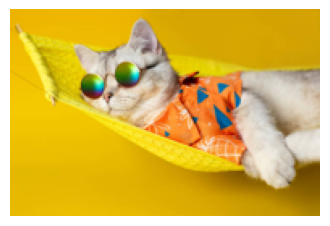

In [4]:
#fastai image loader
#Open the local image test_image.jpg
img = PILImage.create('cat.jpg')
#show the image
img.thumbnail((192,192))
img.show()
#Predict the image and save the 3 variables returned, the prediction, the index of the prediction and the probabilities of each class
pred,pred_idx,probs = learn.predict(img)
print(f"Prediction (Cat?): {pred}; Probability: {probs[pred_idx]:.04f}")

In [5]:
#|export

labels = ['Dog', 'Cat']

def predict_image(img):
    #Function to predict input image and return a dictionary with each label and probability (as a float)
    pred,pred_idx,probs = learn.predict(img)
    return dict(zip(labels, map(float, probs)))

In [6]:
predict_image(img)

{'Dog': 0.00045402543037198484, 'Cat': 0.9995459914207458}

In [7]:
#|export
#Define the Gradio Interface

image = gr.inputs.Image(shape=(224, 224))
label = gr.outputs.Label()
examples = ['dog.jpg', 'cat.jpg', 'hamster.jpg']

interface = gr.Interface(fn=predict_image, inputs=image, outputs=label, examples=examples)
interface.launch(inline=False)

/home/jealk/mambaforge/envs/fastai/lib/python3.11/site-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/home/jealk/mambaforge/envs/fastai/lib/python3.11/site-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/home/jealk/mambaforge/envs/fastai/lib/python3.11/site-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/home/jealk/mambaforge/envs/fastai/lib/python3.11/site-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


## Export as py.file

In [1]:
import nbdev

### OBS! Launch as admin
If problem that below is run sucesfull but not file created, it is simply because you have to run VS Code as admin

In [10]:
nbdev.export.nb_export('dog_cat_predicter.ipynb', './')
#New export command than from tutorial


In [30]:
#from nbdev.notebook2script import convert_notebook
#convert_notebook('dog_cat_predicter-2.ipynb','./app.py')

ModuleNotFoundError: No module named 'nbdev.notebook2script'

In [37]:
import os
print(os.getcwd())

/home/jealk/src/fastai_course/02_production
